In [1]:
from sklearn import datasets, model_selection, svm, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.externals import joblib
import numpy as np
import pandas as pd
import threading
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp

In [15]:
##Prepare data##

filename=r'drone_delivery.csv'
data_train=pd.read_csv(filename,index_col=None,na_values='?',sep = ';')
data_train=data_train.drop(['clientid'], axis=1)
data_train=data_train.dropna()

print("\nDESCRIBE DATA:\n",data_train.describe())
data_train.describe().to_excel(r'original_Describe.xlsx')

X=data_train['x']
y=data_train['y']
print(X.shape)
print(y.shape)


DESCRIBE DATA:
                  x            y
count  5956.000000  5956.000000
mean    508.823177   427.554772
std     271.061462   289.044640
min       0.017692     0.043285
25%     282.582920   170.079921
50%     518.100892   397.786441
75%     727.156497   669.982518
max     999.533215   999.731720
(5956,)
(5956,)


In [14]:
   # Finalize and render the figure


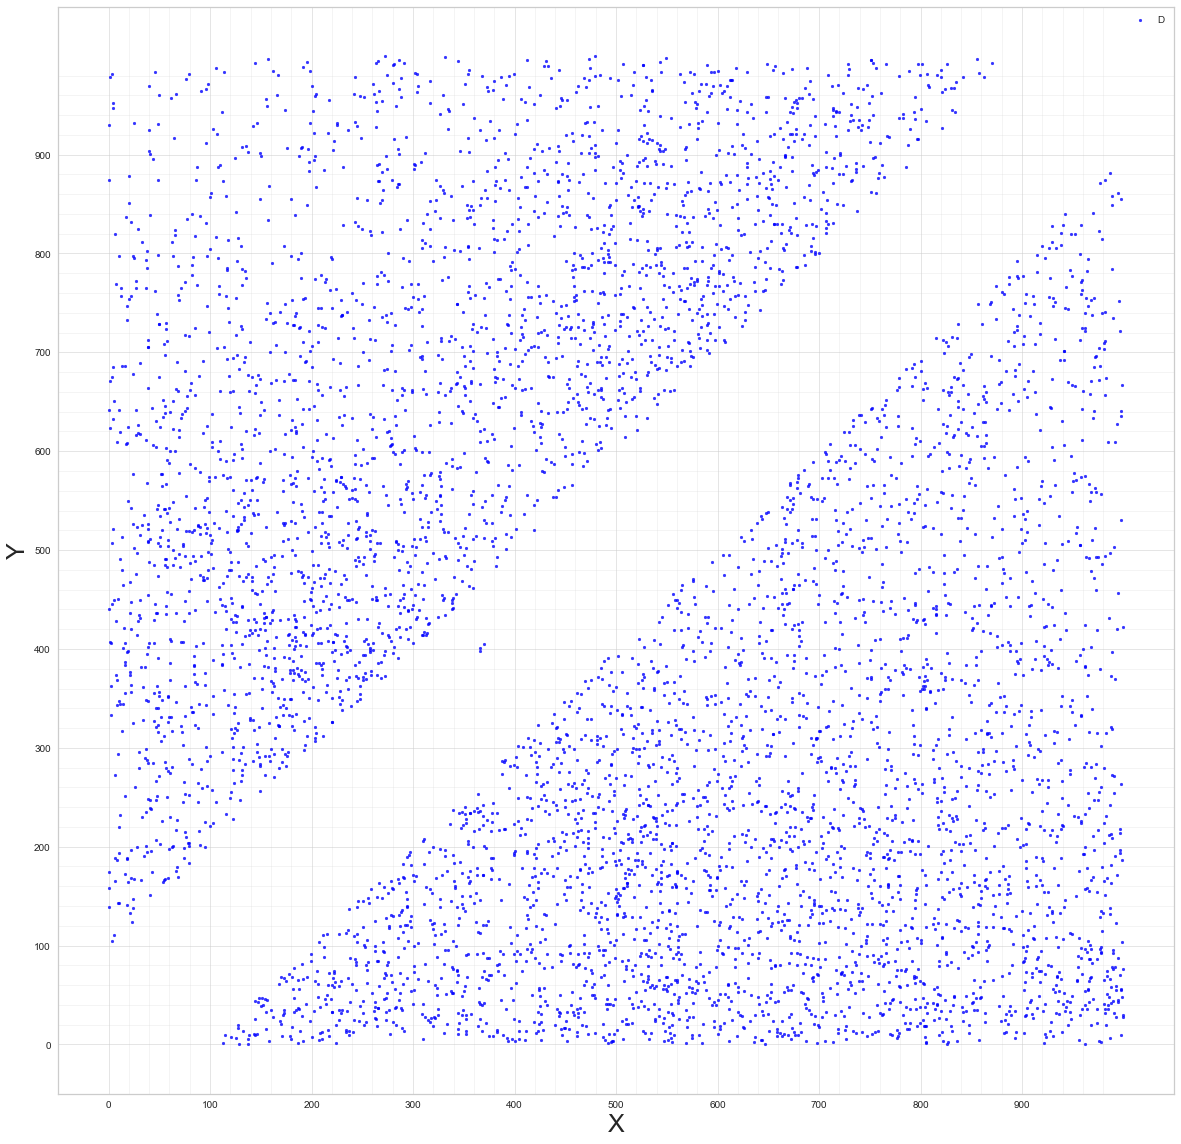

In [16]:
###SCATTER XY####

ax=data_train.plot(kind="scatter", x="x", y="y",
    s=8,
    c="blue", alpha=0.8, figsize=(20,20),
)


##Initializing grid
major_ticks = np.arange(0, 1000, 100)
minor_ticks = np.arange(0, 1000, 20)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.grid(True)
plt.ylabel("Y", fontsize=25)
plt.xlabel("X", fontsize=25)
plt.legend("Drone XYlllll")
plt.show()

In [ ]:
###Elbow method###
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
#X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(data_train)        # Fit the data to the visualizer
visualizer.show()   

In [ ]:
# create a pandas data frame with columns
centroids_df = pd.DataFrame(centroids, columns=colnames)
print('\nCLUSTER CENTROIDS:\n',centroids_df)
centroids_df.to_excel(r'centroids.xlsx')

In [ ]:
###Preparing for elbowMethod###
Sum_of_squared_data = []
K = range(1,7)
for k in K:
    km = cluster.KMeans(n_clusters=k)
    km = km.fit(df_scaled)
    Sum_of_squared_data.append(km.inertia_)

In [ ]:
plt.plot(K, Sum_of_squared_data, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from scipy.interpolate import make_interp_spline, BSpline

# 300 represents number of points to make between T.min and T.max
xnew = np.linspace(1, 6, 12) 

spl = make_interp_spline(K, Sum_of_squared_data, k=3)  # type: BSpline
power_smooth = spl(xnew)

plt.plot(xnew, power_smooth,'bx-')
plt.savefig('ElbowMethod_arvostukset_clusters_'+str(num_clusters)+'.png',bbox_inches='tight')
plt.show()

In [ ]:
###Original data with clusters###save to Excel

#Inverse scaled data
#inversed_df = scaler.inverse_transform(df_scaled)


#invert_df = pd.DataFrame(inversed_df, columns=colnames)
data_train['Cluster'] = pd.DataFrame(predict, index=df_scaled.index)
data_train.to_excel(r'original_data_with_clusters.xlsx')
print('\nORIGINAL DATA WITH CLUSTER INDEX:\n',data_train.head(10))

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
#X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(df_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
from yellowbrick.features import Rank2D

#df_scaled = pd.DataFrame(df_scaled, columns=colnames)
#print (df_scaled)
#df_scaled.columns=colnames
#print(df_scaled)

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(data_train)# or df_scaled
visualizer.show()